https://www.kaggle.com/datasets/aditijuneja/github-bipartite-graph-datasetdevelopersrepos

In [ ]:
!pip install powerlaw kagglehub


import powerlaw
import networkx as nx

import kagglehub

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

  Using cached powerlaw-1.5-py3-none-any.whl.metadata (9.3 kB)
  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
Using cached powerlaw-1.5-py3-none-any.whl (24 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [powerlaw]


In [ ]:

path = kagglehub.dataset_download("aditijuneja/github-bipartite-graph-datasetdevelopersrepos")

print("Path to dataset files:", path)
df=pd.read_csv(path+"/edgelist.csv",skiprows=1,names=['isForked', 'isTopContributor', 'repo_id',  'dev_id'])


dev_df = pd.read_csv(path+'/github-Data(2)/developers.csv',)
repos_df = pd.read_csv(path+'/github-Data(2)/repositories.csv')
edges_df = pd.read_csv(path+'/edgelist.csv',skiprows=1)

Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/aditijuneja/github-bipartite-graph-datasetdevelopersrepos/versions/4


In [ ]:
edges=df[['repo_id','dev_id']]
#print(dev_df)
github_graph_full = nx.Graph()
# Add node attributes for bipartite sets
github_graph_full.add_nodes_from(repos_df['repo_id'], bipartite=0)  # repos
github_graph_full.add_nodes_from(dev_df['dev_id'], bipartite=1)   # devs
github_graph_full.add_edges_from(edges.itertuples(index=False, name=None))


repos = {n for n, d in github_graph_full.nodes(data=True) if d.get("bipartite") == 0}

devs  = {n for n, d in github_graph_full.nodes(data=True) if d.get("bipartite") == 1}
print(github_graph_full)

Graph with 2954 nodes and 3050 edges


In [ ]:

pos = nx.kamada_kawai_layout(github_graph_full)


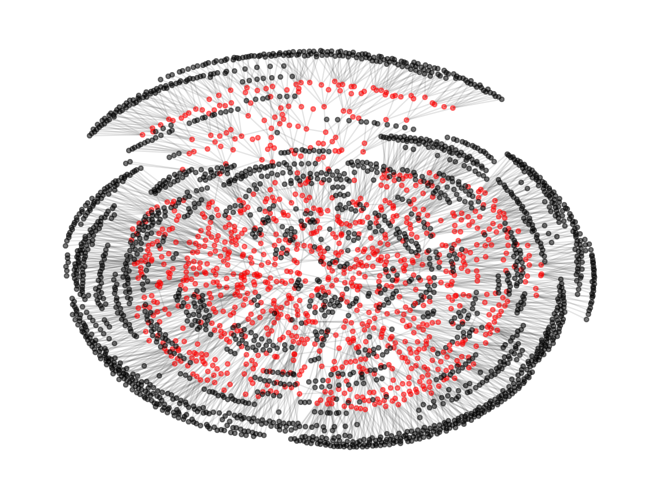

In [ ]:

nx.draw(github_graph_full, pos ,node_color=[(0,0,0,0.5) if n in repos else (1,0,0,0.5) for n in github_graph_full.nodes()],node_size=10,edge_color=(0,0,0,0.1))
plt.show()

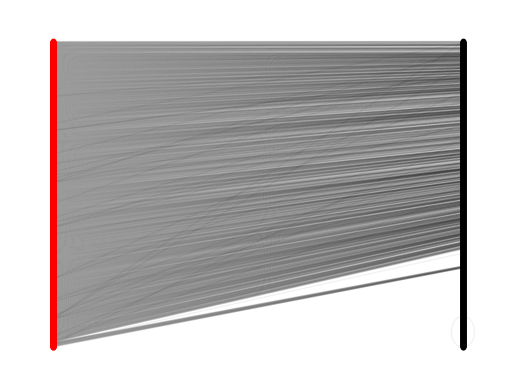

In [ ]:

pos = nx.bipartite_layout(github_graph_full,repos)

nx.draw_networkx_nodes(github_graph_full, pos, nodelist=repos, node_color="red", node_size=10)
nx.draw_networkx_nodes(github_graph_full, pos, nodelist=devs, node_color="black", node_size=10)
nx.draw_networkx_edges(github_graph_full, pos, edge_color=(0,0,0,0.05))
plt.axis('off')
plt.show()

In [ ]:

repo_degrees = [ github_graph_full.degree(n) for n in repos]
dev_degrees = [ github_graph_full.degree(n) for n in devs]

print("devs\n")
powerlaw_devs=powerlaw.Fit(dev_degrees)
print("KS/D fit val:",powerlaw_devs.power_law.D)
print("alpha:",powerlaw_devs.power_law.alpha)
print("sigma:",powerlaw_devs.power_law.sigma)
print("xmin:",powerlaw_devs.power_law.xmin)
R, p = powerlaw_devs.distribution_compare('power_law', 'exponential')
print("Log-likelihood ratio R (power_law vs exponential) =", R)
print("p-value for comparison =", p)

print("repos\n")
powerlaw_repos=powerlaw.Fit(repo_degrees)
print("KS/D fit val:",powerlaw_repos.power_law.D)
print("alpha:",powerlaw_repos.power_law.alpha)
print("sigma:",powerlaw_repos.power_law.sigma)
print("xmin:",powerlaw_repos.power_law.xmin)

R, p = powerlaw_repos.distribution_compare('power_law', 'exponential')
print("Log-likelihood ratio R (power_law vs exponential) =", R)
print("p-value for comparison =", p)


devs

Calculating best minimal value for power law fit
KS/D fit val: 0.05945886680863732
alpha: 67.25566275835823
sigma: 5.391809368098604
xmin: 7.0
Log-likelihood ratio R (power_law vs exponential) = 24.111208966514962
p-value for comparison = 1.8327995753600866e-07
repos

Calculating best minimal value for power law fit
KS/D fit val: 0.012219959266802416
alpha: 103.08843613886235
sigma: 2.3035933138115237
xmin: 1.0
Log-likelihood ratio R (power_law vs exponential) = 917.7629520685333
p-value for comparison = 3.213111696478737e-31


In [ ]:
#from networkx.algorithms import isomorphism

# H2: path of length 2 (3 nodes)
H2 = nx.path_graph(3)

# H3: path of length 3 (4 nodes)
H3 = nx.path_graph(4)

# H4: star with 3 leaves
H4 = nx.star_graph(3)   # center + 3 leaves (4 nodes total)

# H9: small "house" (square with one tail)
H9 = nx.path_graph(2)
square = nx.cycle_graph(4)
H9 = nx.compose(square, H9)
H9.add_edge(0, 4)  # connect tail to one square node

# C4 and C6 cycles
C4 = nx.cycle_graph(4)
C6 = nx.cycle_graph(6)

def count_subgraph_isomorphisms(G, H):
    GM = nx.algorithms.isomorphism.GraphMatcher(G, H)
    count = 0
    for sub_iso in GM.subgraph_isomorphisms_iter():
        count += 1
    return count

def count_unique_subgraphs(G, H):
    GM = nx.algorithms.isomorphism.GraphMatcher(G, H)
    matches = set()
    for sub_iso in GM.subgraph_isomorphisms_iter():
        matches.add(frozenset(sub_iso.keys()))  # store node sets, not mappings
    return len(matches)

In [ ]:


print("H2 count:", count_unique_subgraphs(github_graph_full, H2))
print("H3 count:", count_unique_subgraphs(github_graph_full, H3))

H2 count: 8457
H3 count: 15914


In [ ]:

print("H4 count:", count_unique_subgraphs(github_graph_full, H4))
print("H9 count:", count_unique_subgraphs(github_graph_full,H9))


H4 count: 10860
H9 count: 38


In [ ]:
print("C4 count:", count_unique_subgraphs(github_graph_full, C4))
print("C6 count:", count_unique_subgraphs(github_graph_full, C6))

C4 count: 3
C6 count: 4
